In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
import pyhf
import numpy as np

In [30]:
spec = {'channels': [
            {'name': 'higgs_SR',
             'samples': [
                {'name': 'higgs',
                 'data': [100],
                 'modifiers': [{'name':'mu', 'type': 'normfactor', 'data': None}]
                },
                {'name': 'background',
                 'data': [1],
                 'modifiers': [{'name': 'bkg_uncert', 'type': 'shapesys', 'data': [1]}], 
                }
             ]
            }
        ],
        'observations': [
            {'name': 'higgs_SR', 'data': [50]}
        ],
        'measurements': [
            {'name': 'measurement', 'config': {'poi': 'mu', 'parameters':[
                {'name': 'mu',
                 'bounds': [[0,10]],
                 'inits': [1]
                }
            ]}
            }
        ],
        'version': '1.0.0'}

In [31]:
ws = pyhf.Workspace(spec)

In [32]:
model = ws.model()

In [33]:
data = ws.data(model)

In [34]:
mu_tests = np.linspace(0, 1, 16)
hypo_tests = [pyhf.infer.hypotest(mu, data, model, model.config.suggested_init(), model.config.suggested_bounds(),
                                 return_expected_set=True, return_test_statistics=True)
              for mu in mu_tests]


In [35]:
test_stats = np.array([test[-1][0] for test in hypo_tests]).flatten()
cls_obs = np.array([test[0] for test in hypo_tests]).flatten()
cls_exp = [np.array([test[1][i] for test in hypo_tests]).flatten() for i in range(5)]

In [36]:
def plot_results(ax, test_mus, cls_obs, cls_exp, test_size=0.05):
    ax.plot(mu_tests, cls_obs, c = 'k')
    for i,c in zip(range(5),['k','k','k','k','k']):
        ax.plot(mu_tests, cls_exp[i], c = c, linestyle = 'dotted' if i!=2 else 'dashed')
    ax.fill_between(test_mus,cls_exp[0],cls_exp[-1], facecolor = 'y')
    ax.fill_between(test_mus,cls_exp[1],cls_exp[-2], facecolor = 'g')
    ax.plot(test_mus,[test_size]*len(test_mus), c = 'r')
    ax.set_ylim(0,1)

<IPython.core.display.Javascript object>


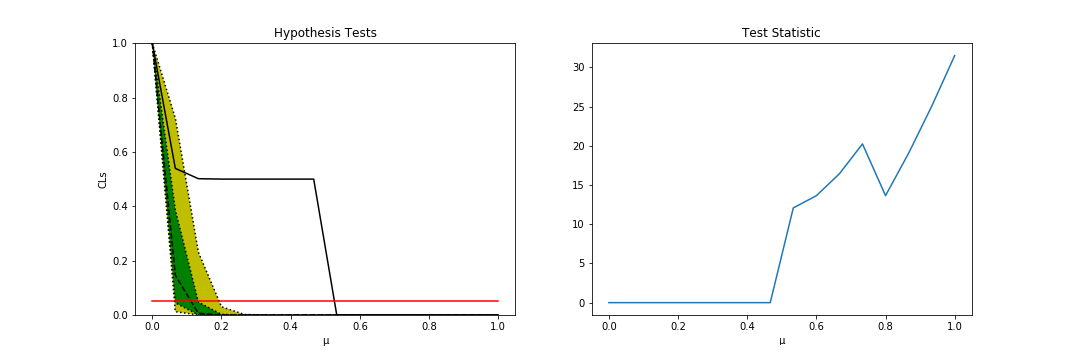

In [37]:
%matplotlib notebook

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

ax1.set_title(u'Hypothesis Tests')
ax1.set_ylabel(u'CLs')
ax1.set_xlabel(u'µ')
plot_results(ax1, mu_tests, cls_obs, cls_exp)


ax2.set_title(u'Test Statistic')
ax2.set_xlabel(u'µ')
ax2.plot(mu_tests,test_stats);